In [1]:
# importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [2]:
# Loading the mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Printing the shapes of the data.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 3s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


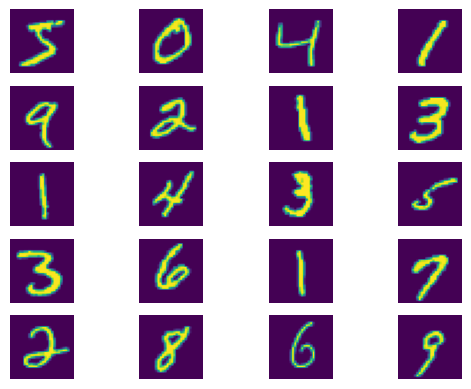

In [4]:
# Ploting the first 20 images from X_train
for i in range(20):
    plt.subplot(5, 4, i+1)  # Creating a subplot with 5 rows and 4 columns
    plt.imshow(X_train[i])  # Showing the i-th image
    plt.axis('off')  # Turning off axis labels
    

plt.show()

In [5]:
# One Hot Encoding the class labels
Y_train = tf.keras .utils.to_categorical(y_train, num_classes=10)
Y_test = tf.keras .utils.to_categorical(y_test, num_classes=10)

In [6]:
# Reshaping the training and testing sets
X_train = X_train.reshape(60000, 28, 28,1)
X_test = X_test.reshape(10000, 28, 28,1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
# Getting the shape of one of the train and test images 
print(X_train[1].shape)
print(X_test[1].shape )

(28, 28, 1)
(28, 28, 1)


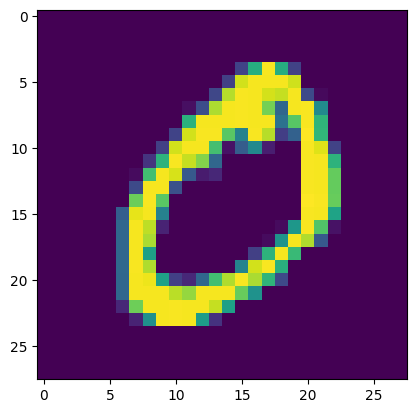

In [8]:
plt.imshow(X_train[1])

In [9]:
# Normalizing the pixel values to the range of [0, 1].
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# X_train = X_train / 255
# X_test = X_test / 255

In [10]:
# Building the model (Constructor Stage)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.optimizers import SGD

## The Baseline Model named mnist_model.



In [11]:
# Defining the CNN Architecture

mnist_model = Sequential()
mnist_model.add(
    Conv2D(
        filters=32,
        kernel_size=(2,2),
        input_shape=(28,28,1),
        activation = 'relu',
        padding = 'same'
    )
)
mnist_model.add(MaxPooling2D(pool_size=(2,2)))

mnist_model.add(Conv2D(filters=64,kernel_size=(2,2),activation = 'relu'))
mnist_model.add(MaxPooling2D(pool_size=(2,2)))

mnist_model.add(Conv2D(filters=128,kernel_size=(2,2),activation = 'relu'))
mnist_model.add(MaxPooling2D(pool_size=(2,2)))

mnist_model.add(Flatten())
mnist_model.add(Dense(128,activation = 'relu'))
mnist_model.add(Dropout(0.5))
mnist_model.add(Dense(10,activation = 'softmax'))

In [12]:
# printing the summary of the constructed mnist model
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [13]:
# Compiling the model, i.e. associating a loss function and the chosen variant of SGD

mnist_model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics =['accuracy']
)

In [14]:
# Training the model
hist = mnist_model.fit(X_train, Y_train , batch_size=32, epochs=20,
                       validation_data = (X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 24s 5ms/step - loss: 1.1780 - accuracy: 0.6146 - val_loss: 0.2602 - val_accuracy: 0.9228
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3165 - accuracy: 0.9027 - val_loss: 0.1524 - val_accuracy: 0.9514
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2237 - accuracy: 0.9306 - val_loss: 0.1196 - val_accuracy: 0.9619
Epoch 4/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1834 - accuracy: 0.9441 - val_loss: 0.0986 - val_accuracy: 0.9683
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1609 - accuracy: 0.9511 - val_loss: 0.0831 - val_accuracy: 0.9733
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1398 - accuracy: 0.9576 - val_loss: 0.0786 - val_accuracy: 0.9766
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1271 - accuracy: 0.9619 - val_loss: 0.0704 - val_accurac

#### Checking for overfitting


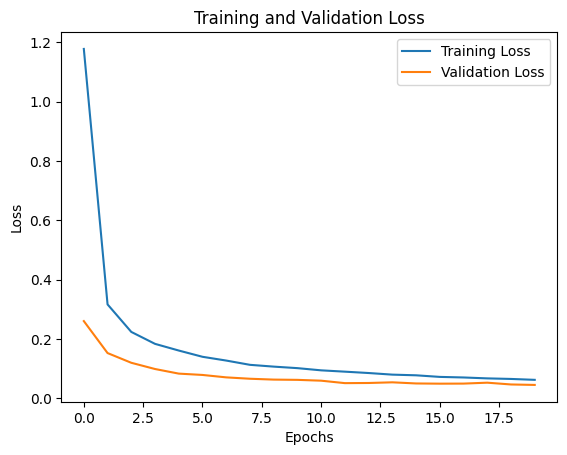

In [15]:
# Plotting training loss against validation loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

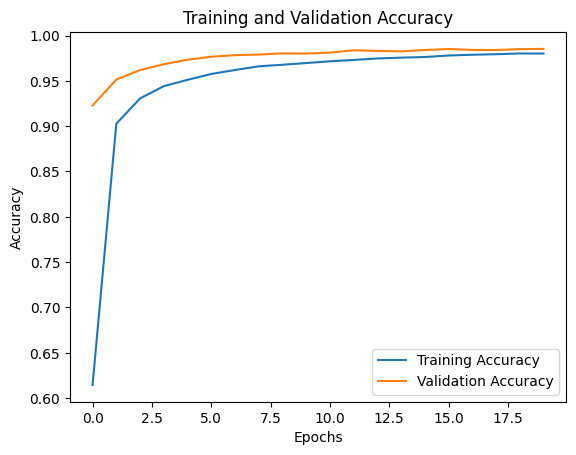

In [16]:
# Plotting training and validation accuracy
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Testing the model (Making predictions)











In [17]:
# Predicting the classes of the test set

y_pred = np.argmax(mnist_model.predict(X_test), axis = -1)

313/313 [==============================] - 1s 2ms/step


#### Visualising the result


In [18]:
from sklearn.metrics import classification_report

# Printing the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

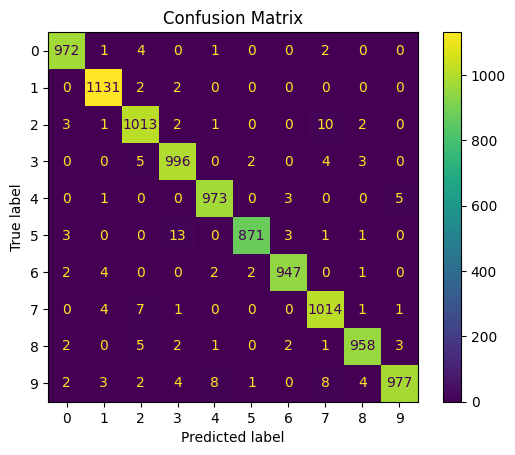

In [19]:
# Printing the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

In [20]:
# checking the correct and incorrect predictions
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]
print(len(correct_indices), "classified correctly")
print(len(incorrect_indices), "classified incorrectly")

9852 classified correctly
148 classified incorrectly


# A. Trying out different regularisation methods on the baseline model

# Using Batch Normalisation regularisation method

In [21]:
# Defining the CNN Architecture

batch_norm_model = Sequential()
batch_norm_model.add(
    Conv2D(
        filters=32,
        kernel_size=(2,2),
        input_shape=(28,28,1),
        activation = 'relu',
        padding = 'same'
    )
)
batch_norm_model.add(MaxPooling2D(pool_size=(2,2)))

batch_norm_model.add(Conv2D(filters=64,kernel_size=(2,2),activation = 'relu'))
batch_norm_model.add(MaxPooling2D(pool_size=(2,2)))

batch_norm_model.add(Conv2D(filters=128,kernel_size=(2,2),activation = 'relu'))
batch_norm_model.add(MaxPooling2D(pool_size=(2,2)))
batch_norm_model.add(BatchNormalization())

batch_norm_model.add(Flatten())
batch_norm_model.add(Dense(128,activation = 'relu'))
batch_norm_model.add(Dropout(0.5))
batch_norm_model.add(Dense(10,activation = 'softmax'))

In [22]:
# printing the summary of the constructed batch_norm model
batch_norm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        8256      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 128)         32896     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

In [23]:
# Compiling the model, i.e. associating a loss function and the chosen variant of SGD

batch_norm_model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics =['accuracy']
)

In [24]:
# Training the batch_norm model
batch_norm_hist = batch_norm_model.fit(X_train, Y_train , batch_size=32, epochs=20,
                       validation_data = (X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3643 - accuracy: 0.8902 - val_loss: 0.0948 - val_accuracy: 0.9691
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1329 - accuracy: 0.9605 - val_loss: 0.0625 - val_accuracy: 0.9811
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0991 - accuracy: 0.9707 - val_loss: 0.0571 - val_accuracy: 0.9813
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0818 - accuracy: 0.9754 - val_loss: 0.0464 - val_accuracy: 0.9860
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0708 - accuracy: 0.9787 - val_loss: 0.0453 - val_accuracy: 0.9861
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0633 - accuracy: 0.9807 - val_loss: 0.0406 - val_accuracy: 0.9873
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0573 - accuracy: 0.9821 - val_loss: 0.0428 - val_acc

#### Checking for overfitting


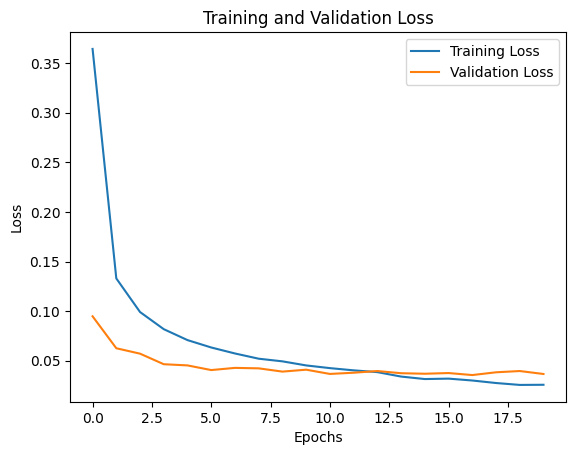

In [25]:
# Plotting training loss against validation loss
plt.plot(batch_norm_hist.history['loss'], label='Training Loss')
plt.plot(batch_norm_hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

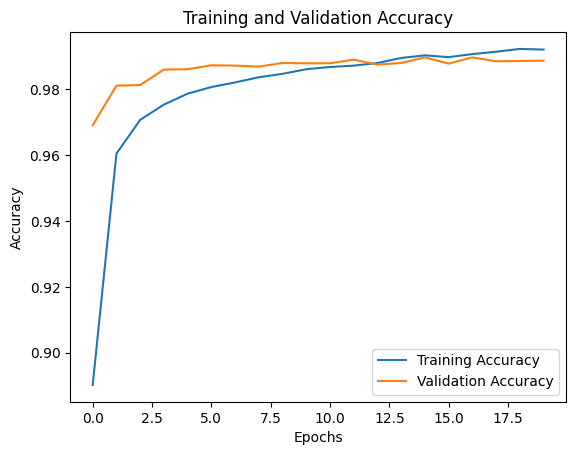

In [26]:
# Plotting training and validation accuracy
plt.plot(batch_norm_hist.history['accuracy'], label='Training Accuracy')
plt.plot(batch_norm_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Testing the model (Making predictions)


In [27]:
# Predicting the classes of the test set
y_pred = np.argmax(batch_norm_model.predict(X_test), axis = -1)

313/313 [==============================] - 1s 2ms/step


#### Visualising the result


In [28]:
# Printing the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

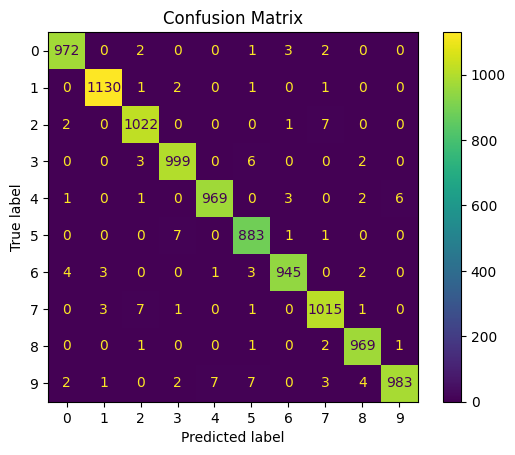

In [29]:
# Printing the confusion matrix
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

In [30]:
# checking the correct and incorrect predictions
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]
print(len(correct_indices), "classified correctly")
print(len(incorrect_indices), "classified incorrectly")

9887 classified correctly
113 classified incorrectly


# Introducing Early Stopping on the Batch Normalization model

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [32]:
# Training the batch_norm model
batch_norm_ES_hist = batch_norm_model.fit(
    X_train, Y_train , batch_size=32, epochs=20, 
    validation_data = (X_test, Y_test), 
    callbacks = tf.keras.callbacks.EarlyStopping(patience=5)
)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.0364 - val_accuracy: 0.9888
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0358 - val_accuracy: 0.9896
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0230 - accuracy: 0.9929 - val_loss: 0.0378 - val_accuracy: 0.9879
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0355 - val_accuracy: 0.9899
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.0357 - val_accuracy: 0.9887
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0394 - val_accuracy: 0.9882
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0378 - val_accura

#### Checking for overfitting


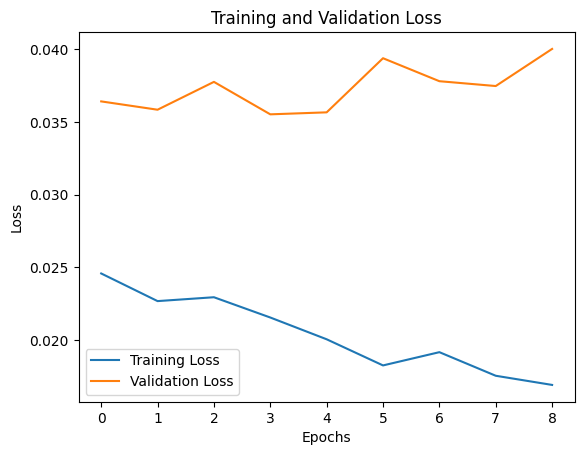

In [33]:
# Plotting training loss against validation loss
plt.plot(batch_norm_ES_hist.history['loss'], label='Training Loss')
plt.plot(batch_norm_ES_hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

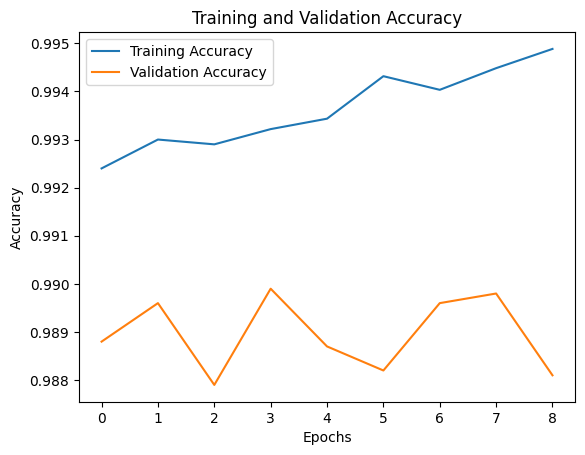

In [34]:
# Plotting training and validation accuracy
plt.plot(batch_norm_ES_hist.history['accuracy'], label='Training Accuracy')
plt.plot(batch_norm_ES_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Testing the model (Making predictions)


In [35]:
# Predicting the classes of the test set

y_pred = np.argmax(batch_norm_model.predict(X_test), axis = -1)

313/313 [==============================] - 1s 2ms/step


#### Visualising the result


In [36]:
# Printing the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

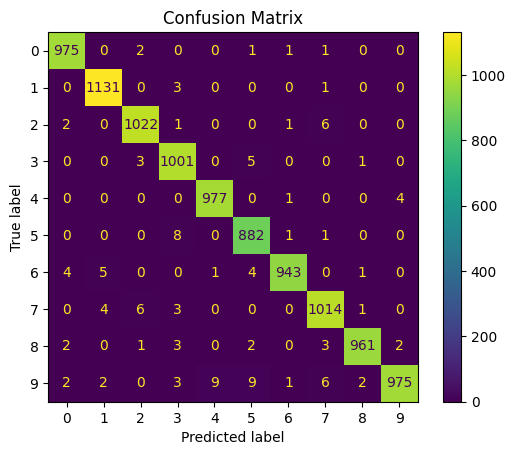

In [37]:
# Printing the confusion matrix
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

In [38]:
# checking the correct and incorrect predictions
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]
print(len(correct_indices), "classified correctly")
print(len(incorrect_indices), "classified incorrectly")

9881 classified correctly
119 classified incorrectly


# Using Data Augmentation Regularisation method

In [39]:
# Importing image data generator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
# Defining the data augmentation parameters for training set
train_datagen = ImageDataGenerator(
 rotation_range=20, # Randomly rotating the images up to 20 degrees
 width_shift_range=0.1, # Randomly shifting images horizontally up to 10% of the width
 height_shift_range=0.1, # Randomly shifting images vertically up to 10% of the height
 horizontal_flip=True, # Randomly flipping images horizontally
 vertical_flip=False, # Not randomly flipping the  images vertically
 shear_range=0.10, # Cropping some parts of the image
 zoom_range=0.10 # #zooming the image by 10%
)

In [41]:
# Fitting the transformation to the training dataset
train_datagen.fit(X_train)

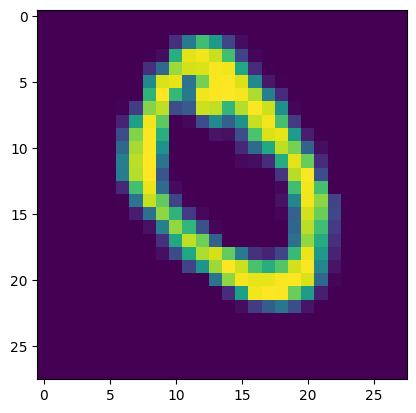

In [42]:
# showing sample of a transformation
plt.imshow(train_datagen.random_transform(X_train[1]))

In [43]:
# Defining the CNN Architecture

data_aug_model = Sequential()
data_aug_model.add(
    Conv2D(
        filters=32,
        kernel_size=(2,2),
        input_shape=(28,28,1),
        activation = 'relu',
        padding = 'same'
    )
)
data_aug_model.add(MaxPooling2D(pool_size=(2,2)))

data_aug_model.add(Conv2D(filters=64,kernel_size=(2,2),activation = 'relu'))
data_aug_model.add(MaxPooling2D(pool_size=(2,2)))

data_aug_model.add(Conv2D(filters=128,kernel_size=(2,2),activation = 'relu'))
data_aug_model.add(MaxPooling2D(pool_size=(2,2)))

data_aug_model.add(Flatten())
data_aug_model.add(Dense(128,activation = 'relu'))
data_aug_model.add(Dropout(0.5))
data_aug_model.add(Dense(10,activation = 'softmax'))

In [44]:
# printing the summary of the constructed data_aug model
data_aug_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        8256      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 128)         32896     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [45]:
# Compiling the model, i.e. associating a loss function and the chosen variant of SGD

data_aug_model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy', metrics =['accuracy']
)

In [46]:
# Training the data_aug model
data_aug_hist = data_aug_model.fit(
    train_datagen.flow(X_train, Y_train),
    batch_size=32, epochs=20, 
    validation_data = (X_test, Y_test)
)

Epoch 1/20
1875/1875 [==============================] - 30s 16ms/step - loss: 2.0159 - accuracy: 0.2905 - val_loss: 0.9971 - val_accuracy: 0.6807
Epoch 2/20
1875/1875 [==============================] - 29s 16ms/step - loss: 1.1435 - accuracy: 0.6087 - val_loss: 0.5556 - val_accuracy: 0.8247
Epoch 3/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.8705 - accuracy: 0.7061 - val_loss: 0.3834 - val_accuracy: 0.8712
Epoch 4/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.7358 - accuracy: 0.7570 - val_loss: 0.3131 - val_accuracy: 0.8991
Epoch 5/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.6442 - accuracy: 0.7888 - val_loss: 0.2433 - val_accuracy: 0.9210
Epoch 6/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5746 - accuracy: 0.8149 - val_loss: 0.1985 - val_accuracy: 0.9369
Epoch 7/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5240 - accuracy: 0.8333 - val_loss: 0.1788 -

#### Checking for overfitting

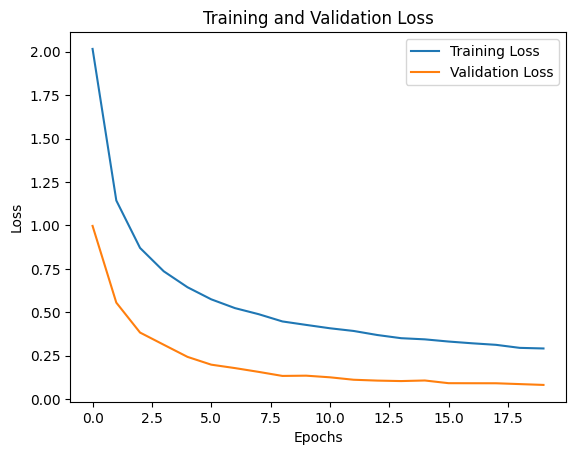

In [47]:
# Plotting training loss against validation loss
plt.plot(data_aug_hist.history['loss'], label='Training Loss')
plt.plot(data_aug_hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

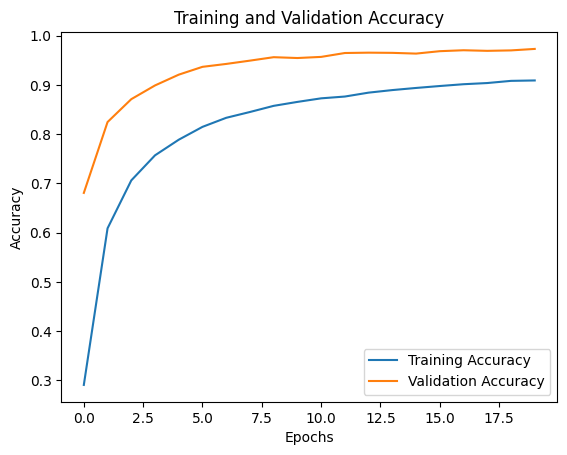

In [48]:
# Plotting training and validation accuracy
plt.plot(data_aug_hist.history['accuracy'], label='Training Accuracy')
plt.plot(data_aug_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Testing the model (Making predictions)


In [49]:
# Predicting the classes of the test set

y_pred = np.argmax(mnist_model.predict(X_test), axis = -1)

313/313 [==============================] - 1s 2ms/step


#### Visualising the result


In [50]:
# Printing the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

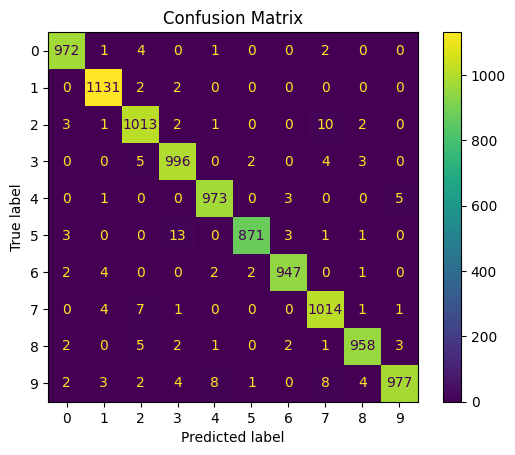

In [51]:
# Printing the confusion matrix
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

In [52]:
# checking the correct and incorrect predictions
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]
print(len(correct_indices), "classified correctly")
print(len(incorrect_indices), "classified incorrectly")

9852 classified correctly
148 classified incorrectly


# B. Changing the number of convolution blocks on the baseline model

#### Using 4 convolution blocks

In [53]:
# Defining the CNN Architecture

mnist_4b_model = Sequential()
mnist_4b_model.add(
    Conv2D(
        filters=32,
        kernel_size=(2,2),
        input_shape=(28,28,1),
        activation = 'relu',
        padding = 'same'
    )
)
mnist_4b_model.add(MaxPooling2D(pool_size=(2,2)))

mnist_4b_model.add(Conv2D(filters=64,kernel_size=(2,2),activation = 'relu'))
mnist_4b_model.add(MaxPooling2D(pool_size=(2,2)))

mnist_4b_model.add(Conv2D(filters=128,kernel_size=(2,2),activation = 'relu', padding = 'same'))
mnist_4b_model.add(MaxPooling2D(pool_size=(2,2)))

mnist_4b_model.add(Conv2D(filters=256,kernel_size=(2,2),activation = 'relu'))
mnist_4b_model.add(MaxPooling2D(pool_size=(2,2)))

mnist_4b_model.add(Flatten())
mnist_4b_model.add(Dense(256,activation = 'relu'))
mnist_4b_model.add(Dropout(0.5))
mnist_4b_model.add(Dense(10,activation = 'softmax'))

In [54]:
# printing the summary of the constructed model
mnist_4b_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        8256      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 6, 6, 128)         32896     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 128)       

In [55]:
# Compiling the model, i.e. associating a loss function and the chosen variant of SGD

mnist_4b_model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics =['accuracy']
)

In [56]:
# Training the model
mnist_4b_hist = mnist_4b_model.fit(X_train, Y_train , batch_size=32, epochs=20,
                       validation_data = (X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 1.2685 - accuracy: 0.5755 - val_loss: 0.2762 - val_accuracy: 0.9149
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2767 - accuracy: 0.9124 - val_loss: 0.1341 - val_accuracy: 0.9599
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1649 - accuracy: 0.9502 - val_loss: 0.1022 - val_accuracy: 0.9666
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1258 - accuracy: 0.9619 - val_loss: 0.0744 - val_accuracy: 0.9748
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1022 - accuracy: 0.9692 - val_loss: 0.0609 - val_accuracy: 0.9795
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0898 - accuracy: 0.9726 - val_loss: 0.0551 - val_accuracy: 0.9817
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0784 - accuracy: 0.9758 - val_loss: 0.0487 - val_accu

#### Checking for overfitting

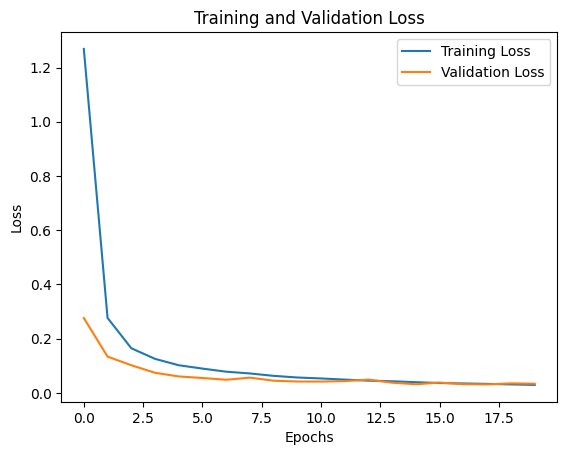

In [57]:
# Plotting training loss against validation loss
plt.plot(mnist_4b_hist.history['loss'], label='Training Loss')
plt.plot(mnist_4b_hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

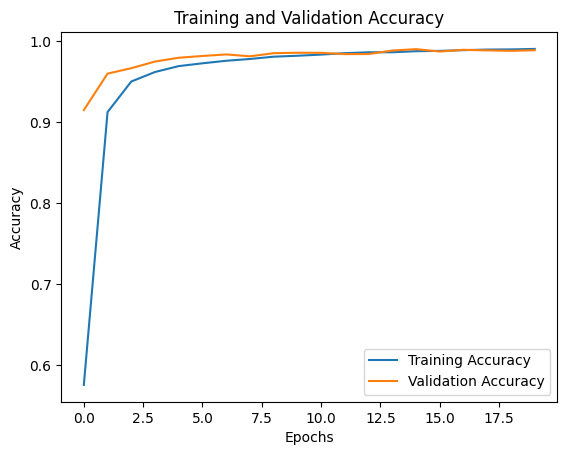

In [58]:
# Plotting training and validation accuracy
plt.plot(mnist_4b_hist.history['accuracy'], label='Training Accuracy')
plt.plot(mnist_4b_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Testing the model (Making predictions)

In [59]:
# Predicting the classes of the test set

y_pred = np.argmax(mnist_4b_model.predict(X_test), axis = -1)

313/313 [==============================] - 1s 2ms/step


#### Visualising the result

In [60]:
from sklearn.metrics import classification_report

# Printing the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

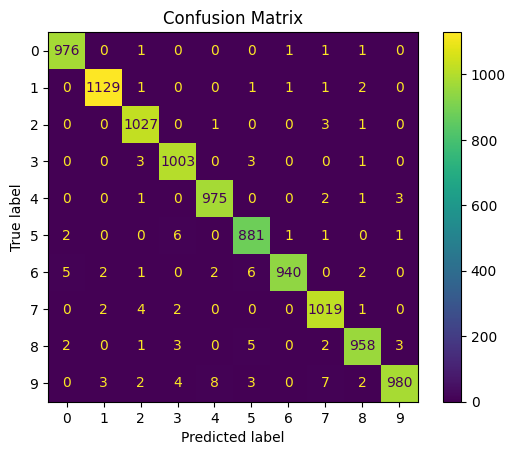

In [61]:
# Printing the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

In [62]:
# checking the correct and incorrect predictions
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]
print(len(correct_indices), "classified correctly")
print(len(incorrect_indices), "classified incorrectly")

9888 classified correctly
112 classified incorrectly


#### Using 5 convolution blocks

In [63]:
# Defining the CNN Architecture

mnist_5b_model = Sequential()
mnist_5b_model.add(
    Conv2D(
        filters=32,
        kernel_size=(2,2),
        input_shape=(28,28,1),
        activation = 'relu',
        padding = 'same'
    )
)
mnist_5b_model.add(MaxPooling2D(pool_size=(2,2)))

mnist_5b_model.add(
    Conv2D(filters=64,kernel_size=(2,2),activation = 'relu', padding = 'same')
)
mnist_5b_model.add(MaxPooling2D(pool_size=(2,2)))

mnist_5b_model.add(
    Conv2D(filters=128,kernel_size=(2,2),activation = 'relu', padding = 'same')
)
mnist_5b_model.add(MaxPooling2D(pool_size=(2,2)))

mnist_5b_model.add(
    Conv2D(filters=256,kernel_size=(2,2),activation = 'relu', padding = 'same')
)
mnist_5b_model.add(MaxPooling2D(pool_size=(2,2)))

mnist_5b_model.add(
    Conv2D(filters=512,kernel_size=(2,2),activation = 'relu', padding = 'same')
)
mnist_5b_model.add(MaxPooling2D(pool_size=(2,2), padding = 'same'))

mnist_5b_model.add(Flatten())
mnist_5b_model.add(Dense(512,activation = 'relu'))
mnist_5b_model.add(Dropout(0.5))
mnist_5b_model.add(Dense(10,activation = 'softmax'))

In [64]:
# printing the summary of the constructed model
mnist_5b_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 128)         32896     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 3, 3, 128)       

In [65]:
# Compiling the model, i.e. associating a loss function and the chosen variant of SGD

mnist_5b_model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics =['accuracy']
)

In [66]:
# Training the model
mnist_5b_hist = mnist_4b_model.fit(X_train, Y_train , batch_size=32, epochs=20,
                       validation_data = (X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0293 - val_accuracy: 0.9904
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0295 - val_accuracy: 0.9899
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.0332 - val_accuracy: 0.9894
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0321 - val_accuracy: 0.9897
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0308 - val_accuracy: 0.9903
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0332 - val_accuracy: 0.9892
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.0341 - val_acc

#### Checking for overfitting

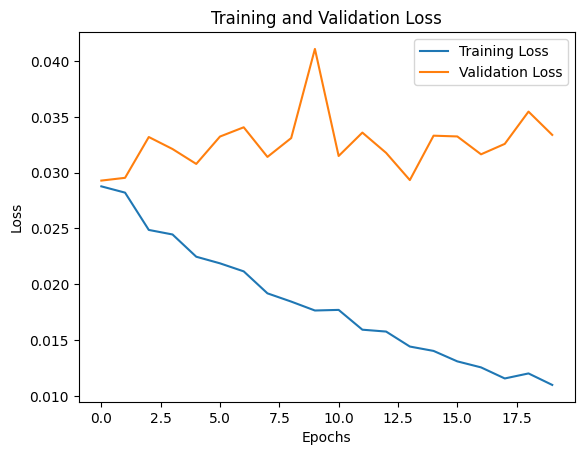

In [67]:
# Plotting training loss against validation loss
plt.plot(mnist_5b_hist.history['loss'], label='Training Loss')
plt.plot(mnist_5b_hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

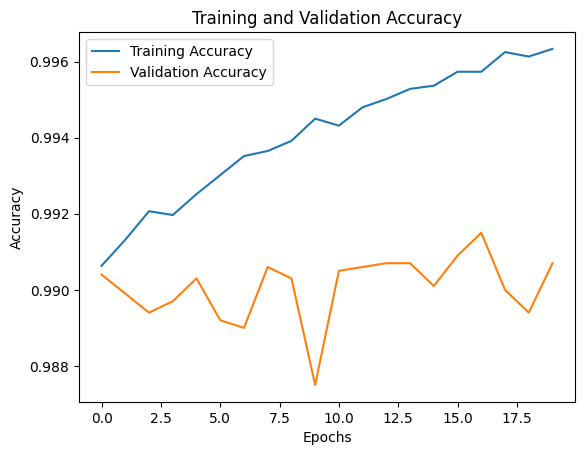

In [68]:
# Plotting training and validation accuracy
plt.plot(mnist_5b_hist.history['accuracy'], label='Training Accuracy')
plt.plot(mnist_5b_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Visualising the result

In [69]:
# Predicting the classes of the test set

y_pred = np.argmax(mnist_5b_model.predict(X_test), axis = -1)

313/313 [==============================] - 1s 3ms/step


In [70]:
# Printing the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.07      0.05      0.06       982
           5       0.10      0.03      0.05       892
           6       0.00      0.00      0.00       958
           7       0.09      0.82      0.17      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.09     10000
   macro avg       0.03      0.09      0.03     10000
weighted avg       0.03      0.09      0.03     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 2000x3000 with 0 Axes>

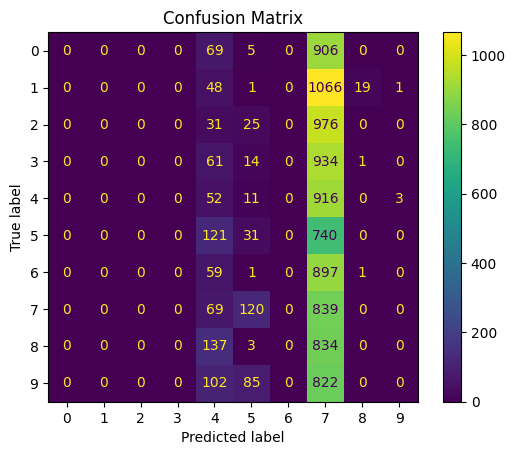

In [71]:
# Printing the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

In [72]:
# checking the correct and incorrect predictions
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]
print(len(correct_indices), "classified correctly")
print(len(incorrect_indices), "classified incorrectly")

922 classified correctly
9078 classified incorrectly


# C. Using different learning rates on the baseline model

#### Learning rate = 0.01

In [73]:
# Compiling the model, i.e. associating a loss function and the chosen variant of SGD

mnist_model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics =['accuracy']
)

In [74]:
# Training the model
lr_01_hist = mnist_model.fit(X_train, Y_train , batch_size=32, epochs=20,
                       validation_data = (X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1363 - accuracy: 0.9591 - val_loss: 0.0543 - val_accuracy: 0.9827
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0870 - accuracy: 0.9739 - val_loss: 0.0541 - val_accuracy: 0.9825
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0671 - accuracy: 0.9795 - val_loss: 0.0546 - val_accuracy: 0.9834
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0595 - accuracy: 0.9820 - val_loss: 0.0511 - val_accuracy: 0.9846
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0532 - accuracy: 0.9838 - val_loss: 0.0426 - val_accuracy: 0.9878
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0451 - val_accuracy: 0.9870
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0426 - accuracy: 0.9869 - val_loss: 0.0447 - val_accura

#### Checking for overfitting

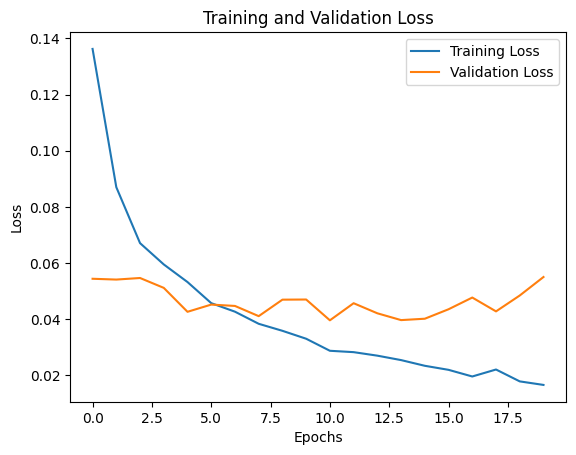

In [75]:
# Plotting training loss against validation loss
plt.plot(lr_01_hist.history['loss'], label='Training Loss')
plt.plot(lr_01_hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

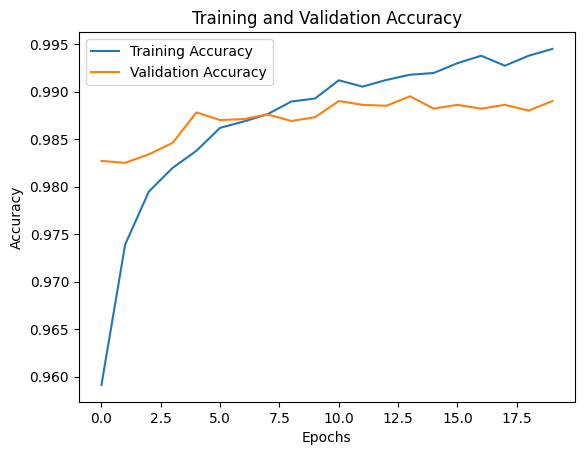

In [76]:
# Plotting training and validation accuracy
plt.plot(lr_01_hist.history['accuracy'], label='Training Accuracy')
plt.plot(lr_01_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Visualising the result

In [77]:
# Predicting the classes of the test set

y_pred = np.argmax(mnist_model.predict(X_test), axis = -1)

313/313 [==============================] - 1s 2ms/step


In [78]:
# Printing the classification report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

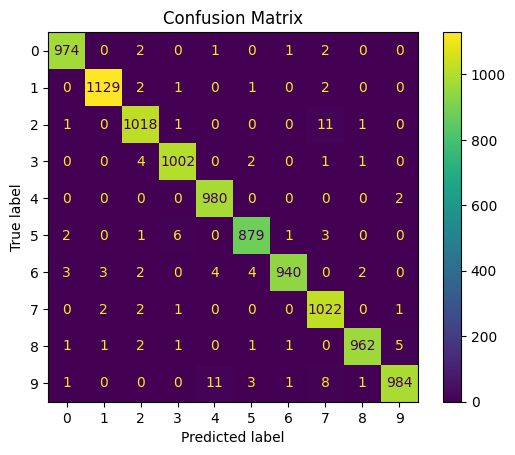

In [79]:
# Printing the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

In [80]:
# checking the correct and incorrect predictions
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]
print(len(correct_indices), "classified correctly")
print(len(incorrect_indices), "classified incorrectly")

9890 classified correctly
110 classified incorrectly


#### Learning rate = 0.1

In [81]:
# Compiling the model, i.e. associating a loss function and the chosen variant of SGD

mnist_model.compile(
    optimizer=SGD(learning_rate=0.1, momentum=0.9),
    loss='categorical_crossentropy',
    metrics =['accuracy']
)

In [82]:
# Training the model
lr_1_hist = mnist_model.fit(X_train, Y_train , batch_size=32, epochs=20,
                       validation_data = (X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.6538 - accuracy: 0.4290 - val_loss: 1.1130 - val_accuracy: 0.6538
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6410 - accuracy: 0.4292 - val_loss: 2.3071 - val_accuracy: 0.1010
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3084 - accuracy: 0.1037 - val_loss: 2.3076 - val_accuracy: 0.1135
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3081 - accuracy: 0.1044 - val_loss: 2.3112 - val_accuracy: 0.1010
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3081 - accuracy: 0.1034 - val_loss: 2.3087 - val_accuracy: 0.0982
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3083 - accuracy: 0.1032 - val_loss: 2.3074 - val_accuracy: 0.1010
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3080 - accuracy: 0.1049 - val_loss: 2.3065 - val_accuracy:

#### Checking for overfitting

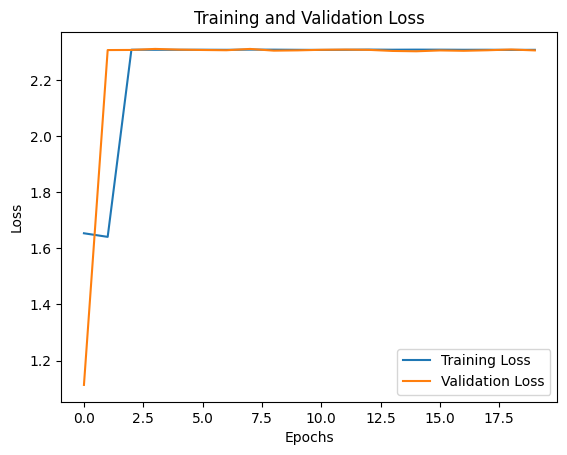

In [83]:
# Plotting training loss against validation loss
plt.plot(lr_1_hist.history['loss'], label='Training Loss')
plt.plot(lr_1_hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

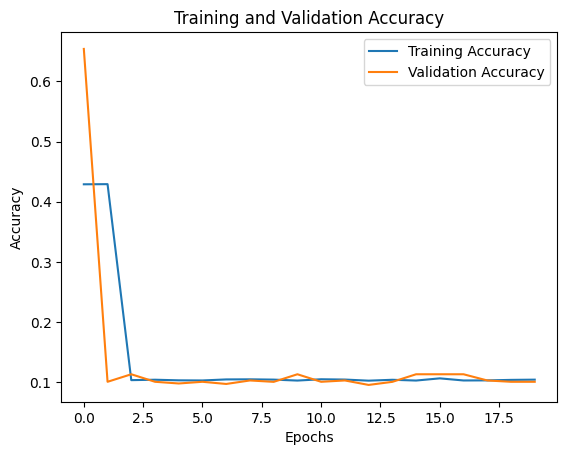

In [84]:
# Plotting training and validation accuracy
plt.plot(lr_1_hist.history['accuracy'], label='Training Accuracy')
plt.plot(lr_1_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Visualising the result

In [85]:
# Predicting the classes of the test set

y_pred = np.argmax(mnist_model.predict(X_test), axis = -1)

313/313 [==============================] - 1s 2ms/step


In [86]:
# Printing the classification report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.10      1.00      0.18      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 2000x3000 with 0 Axes>

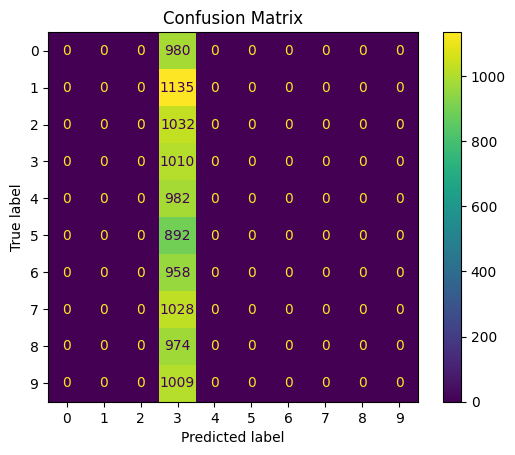

In [87]:
# Printing the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

In [88]:
# checking the correct and incorrect predictions
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]
print(len(correct_indices), "classified correctly")
print(len(incorrect_indices), "classified incorrectly")

1010 classified correctly
8990 classified incorrectly


# D. Case of overfitting observed in the models

In [89]:
# Answered in the report